#Importing Libraries

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



#Importing Dataset

In [80]:
df = pd.read_csv("C:\\Users\\melbi\\OneDrive\\Desktop\\Disease Dataset.csv")

In [81]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [82]:
df.shape

(349, 10)

In [83]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

#Display summary information using info()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


Data types


In [85]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

check for Null values

In [86]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

Exploratory Data Analysis

In [87]:
for i in df:
    j = i.replace(' ','_')
    df.rename(columns = {i:j.capitalize()},inplace = True)

In [88]:
df

,Disease,Fever,Cough,Fatigue,Difficulty_breathing,Age,Gender,Blood_pressure,Cholesterol_level,Outcome_variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [89]:
for i in ['Fever', 'Cough', 'Fatigue','Difficulty_breathing']:
    df[i] = df[i].replace({'Yes':1,'No':0})
    for i in ['Blood_pressure','Cholesterol_level']:
        df[i] = df[i].replace({'Low':0,'Normal':1,'High':2})
        df['Outcome_variable'] = df['Outcome_variable'].replace({'Positive':1,'Negative':0})
        df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})


In [90]:
df

,Disease,Fever,Cough,Fatigue,Difficulty_breathing,Age,Gender,Blood_pressure,Cholesterol_level,Outcome_variable
0,Influenza,1,0,1,1,19,0,0,1,1
1,Common Cold,0,1,1,0,25,0,1,1,0
2,Eczema,0,1,1,0,25,0,1,1,0
3,Asthma,1,1,0,1,25,1,1,1,1
4,Asthma,1,1,0,1,25,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,80,0,2,2,1
345,Stroke,1,0,1,0,85,1,2,2,1
346,Stroke,1,0,1,0,85,1,2,2,1
347,Stroke,1,0,1,0,90,0,2,2,1


Visualisaton Of Data

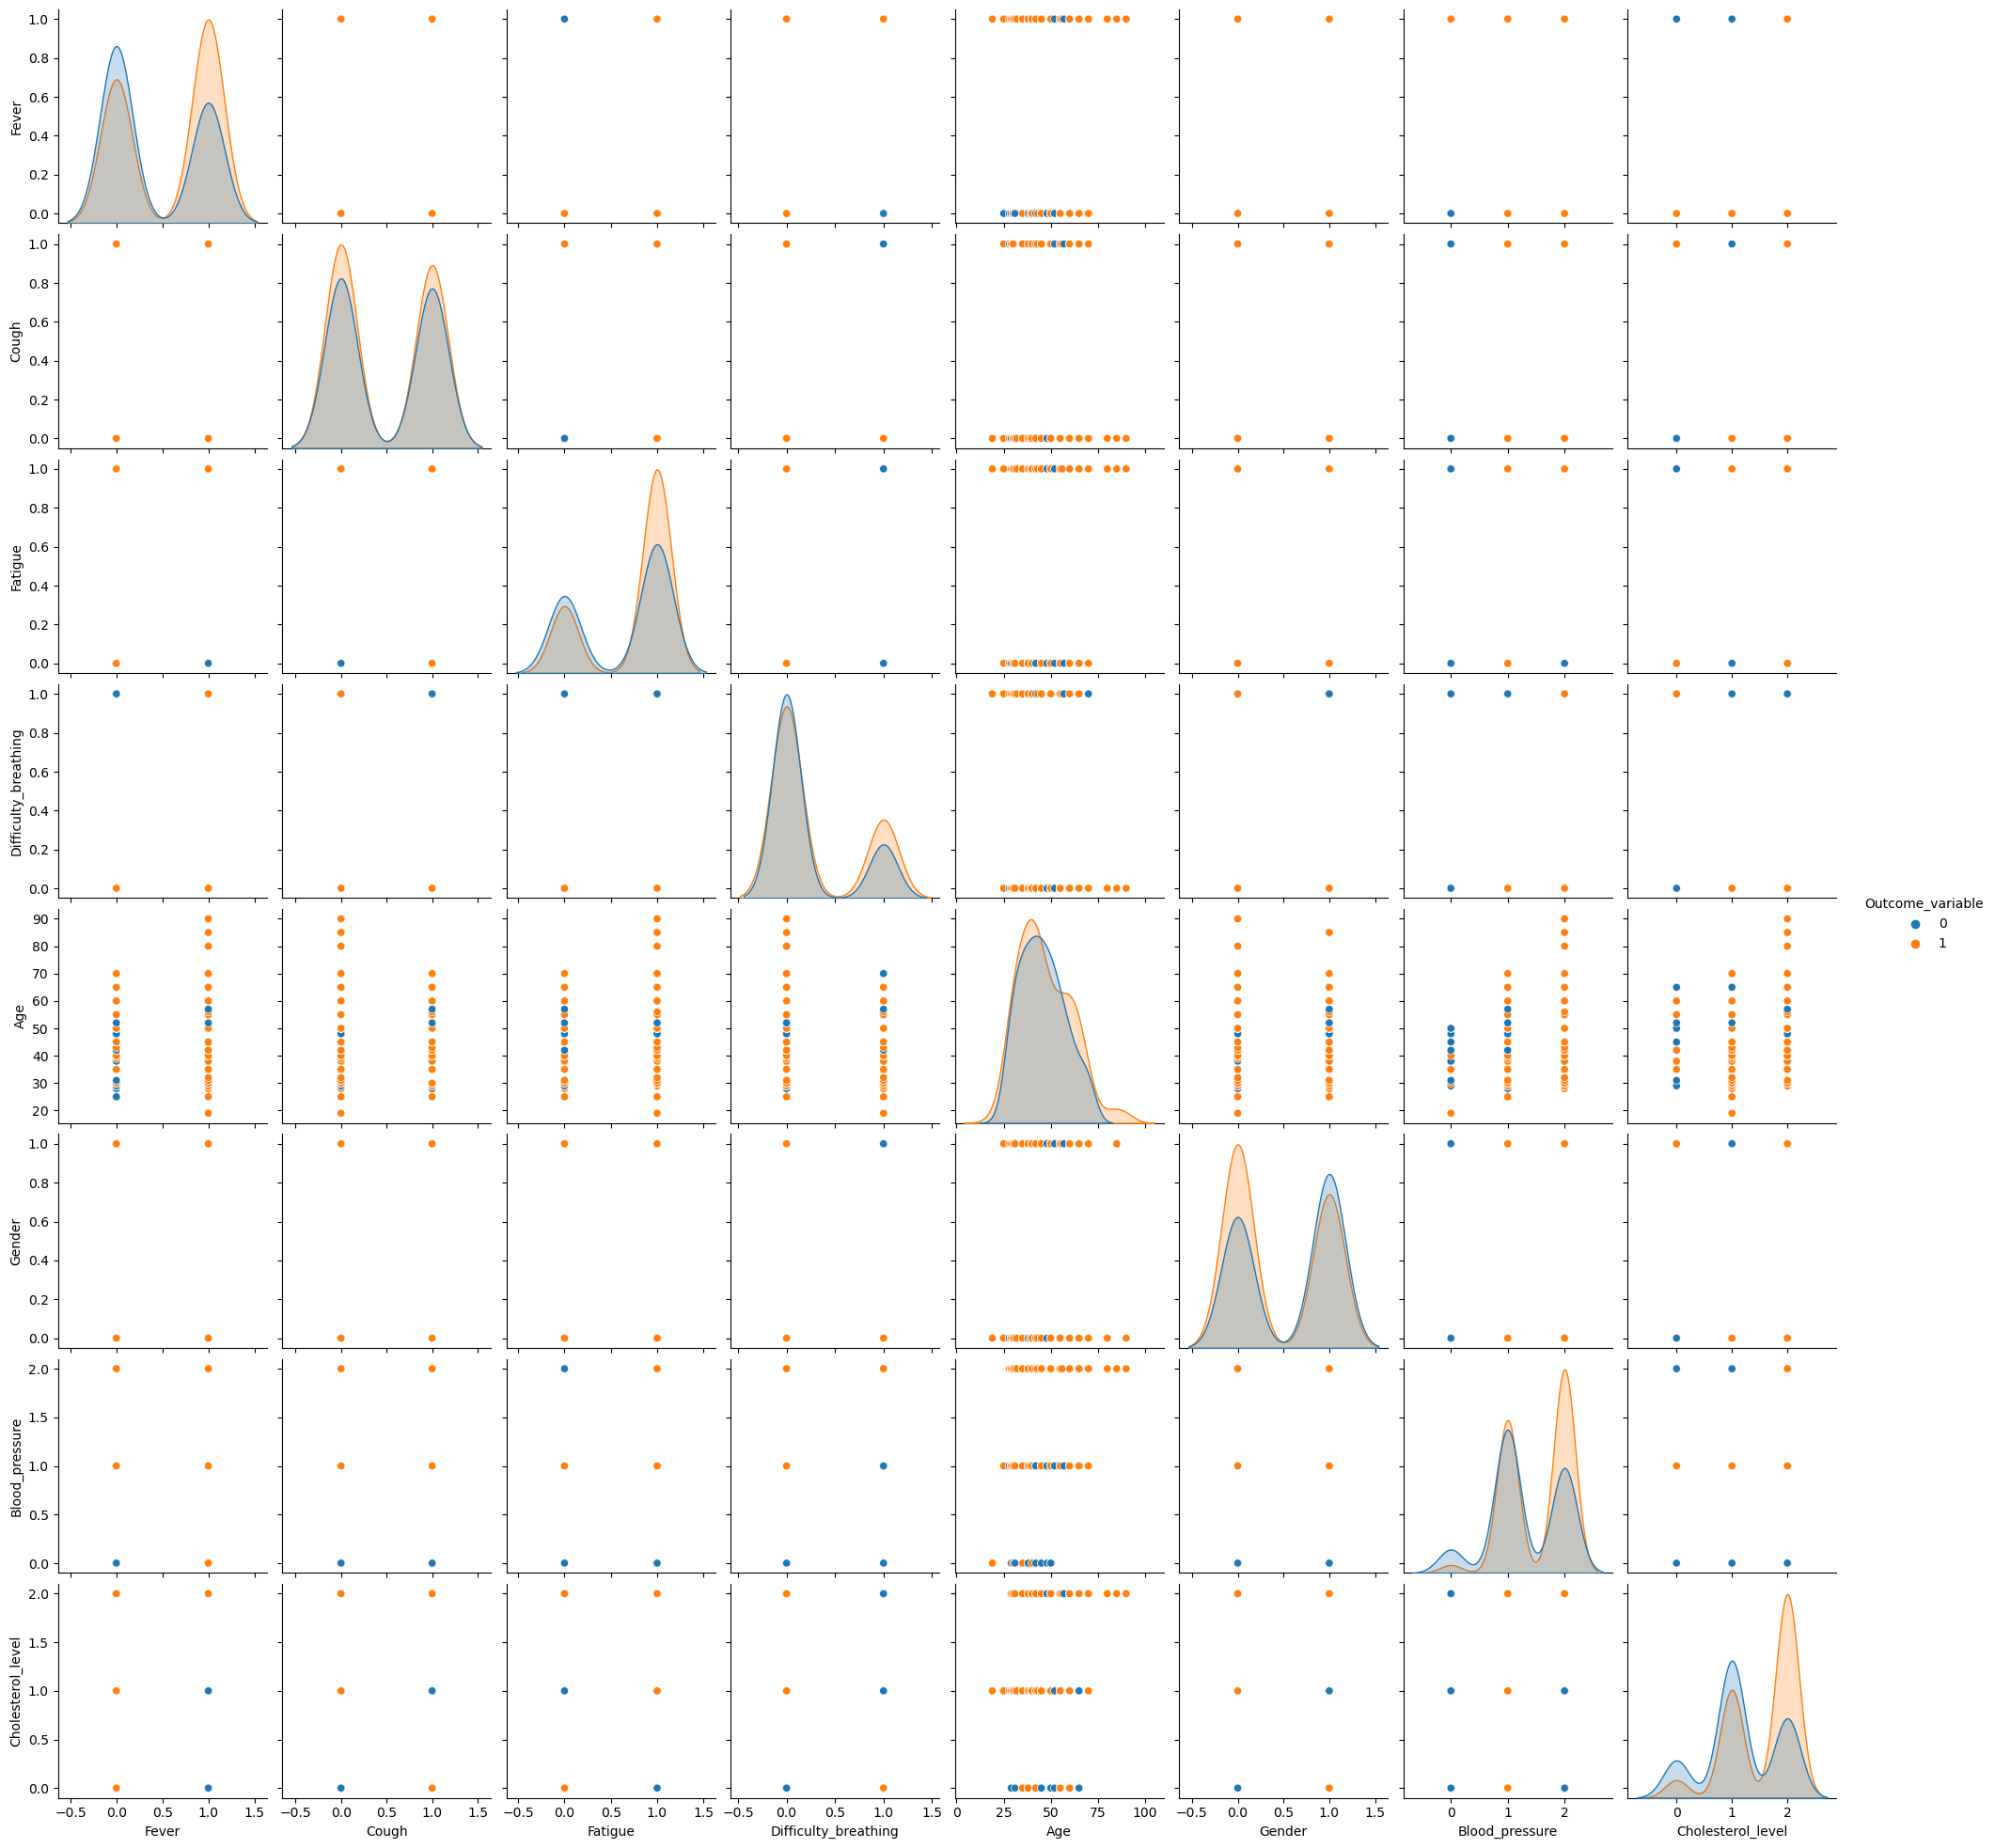

In [91]:
sns.pairplot(df,hue = "Outcome_variable")
plt.show()

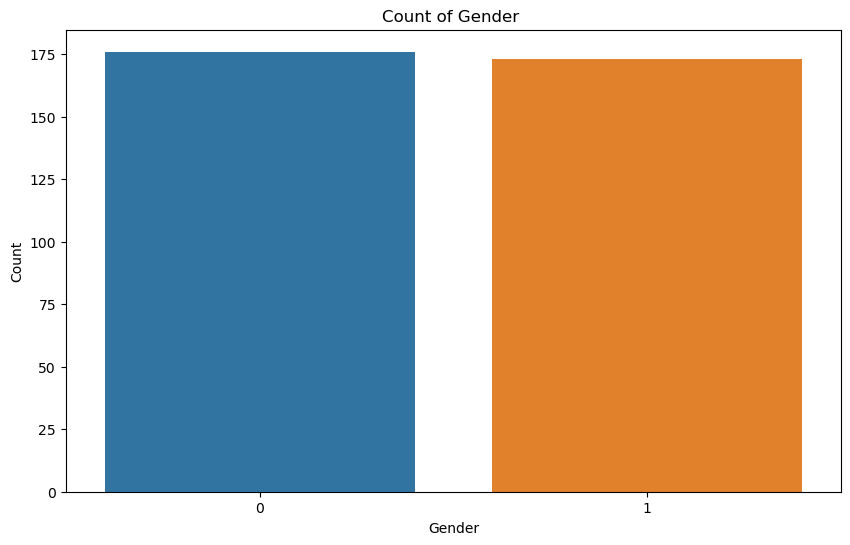

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df)
plt.title('Count of Gender ')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: >

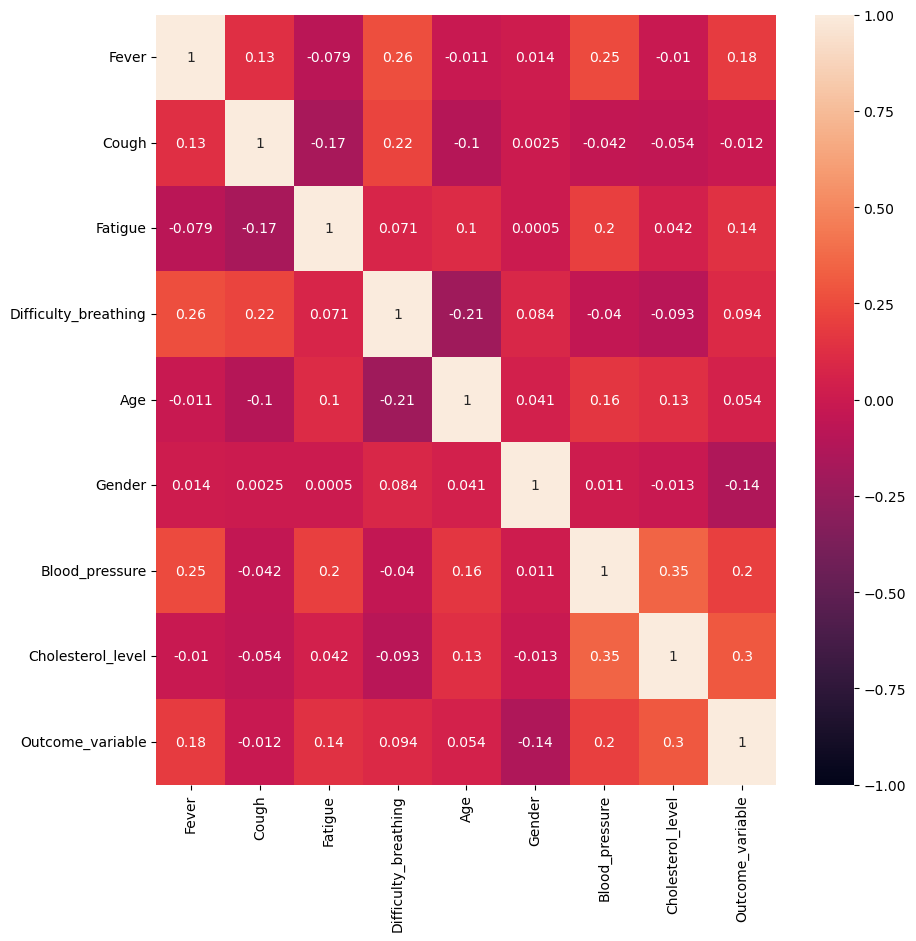

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

#Label Encodeing


In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Disease = le.fit_transform(df.Disease)
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty_breathing,Age,Gender,Blood_pressure,Cholesterol_level,Outcome_variable
0,56,1,0,1,1,19,0,0,1,1
1,24,0,1,1,0,25,0,1,1,0
2,37,0,1,1,0,25,0,1,1,0
3,6,1,1,0,1,25,1,1,1,1
4,6,1,1,0,1,25,1,1,1,1


In [105]:
X=df.drop(columns = "Outcome_variable", axis = 1)
y=df[["Outcome_variable"]]
df2=pd.DataFrame(X)
print(df2.to_string())


     Disease  Fever  Cough  Fatigue  Difficulty_breathing  Age  Gender  Blood_pressure  Cholesterol_level
0         56      1      0        1                     1   19       0               0                  1
1         24      0      1        1                     0   25       0               1                  1
2         37      0      1        1                     0   25       0               1                  1
3          6      1      1        0                     1   25       1               1                  1
4          6      1      1        0                     1   25       1               1                  1
5         37      1      0        0                     0   25       0               1                  1
6         56      1      1        1                     1   25       0               1                  1
7         56      1      1        1                     1   25       0               1                  1
8         53      0      1        0           

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,y, test_size= .25, random_state=0)


In [106]:
print("x_train b4 scaling..")
df3=pd.DataFrame(x_train)
print(df3.to_string())

x_train b4 scaling..
       0  1  2  3  4   5  6  7  8
0     77  1  0  1  1  55  1  2  0
1     51  1  1  0  0  52  1  1  0
2    108  1  1  1  0  60  0  2  2
3    112  1  1  1  0  29  1  2  2
4     54  0  0  1  0  40  0  2  2
5    101  1  0  1  0  65  0  2  0
6    113  1  0  0  0  30  0  1  1
7     77  1  0  0  0  60  1  2  2
8     49  0  1  1  0  60  1  1  0
9     81  0  1  1  1  45  1  1  0
10   112  1  1  0  1  50  1  2  1
11     1  1  0  0  0  50  1  2  2
12     6  1  1  1  1  60  0  2  2
13    30  1  0  1  0  30  0  1  1
14    51  1  0  1  0  55  1  2  1
15   111  0  1  1  0  50  0  1  2
16    90  0  1  0  0  40  0  1  2
17    34  0  0  1  0  50  0  2  2
18    53  1  1  1  0  35  0  1  1
19     6  1  0  1  1  40  1  1  2
20     4  0  1  0  0  29  0  1  2
21    96  1  1  1  0  50  1  1  1
22    20  1  0  1  1  65  0  2  2
23    77  0  1  0  0  60  1  2  2
24    66  0  0  1  0  55  1  2  2
25    92  0  1  1  1  29  0  2  2
26    58  1  1  0  0  45  1  1  2
27     6  1  1  0  1  40  0

In [109]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
print("x_train after scaling...")
df4=pd.DataFrame(x_train)
print(df4.to_string())

x_train after scaling...
            0         1         2         3         4         5         6         7         8
0    0.622588  0.982237 -0.940816  0.667530  1.778814  0.617511  0.982237  0.983281 -2.160076
1   -0.152202  0.982237  1.062907 -1.498061 -0.562172  0.389821  0.982237 -0.720665 -2.160076
2    1.546377  0.982237  1.062907  0.667530 -0.562172  0.996995 -1.018085  0.983281  0.930494
3    1.665575  0.982237  1.062907  0.667530 -0.562172 -1.355804  0.982237  0.983281  0.930494
4   -0.062804 -1.018085 -0.940816  0.667530 -0.562172 -0.520940 -1.018085  0.983281  0.930494
5    1.337779  0.982237 -0.940816  0.667530 -0.562172  1.376479 -1.018085  0.983281 -2.160076
6    1.695375  0.982237 -0.940816 -1.498061 -0.562172 -1.279908 -1.018085 -0.720665 -0.614791
7    0.622588  0.982237 -0.940816 -1.498061 -0.562172  0.996995  0.982237  0.983281  0.930494
8   -0.211802 -1.018085  1.062907  0.667530 -0.562172  0.996995  0.982237 -0.720665 -2.160076
9    0.741787 -1.018085  1.062907  

# 
K-Nearest Neighbor(KNN) Algorithm

In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

#Predicting the test set result

In [112]:
y_pred= classifier.predict(x_test)
print(y_pred)

[1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0]


In [113]:
print("Prediction comparison")
ddf=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(ddf.to_string())

Prediction comparison
    Y_test  Y-pred
0        1       1
1        1       1
2        0       0
3        1       1
4        1       1
5        1       1
6        1       1
7        1       1
8        0       0
9        0       0
10       0       0
11       1       1
12       1       1
13       1       1
14       0       0
15       0       0
16       0       0
17       1       1
18       0       1
19       0       0
20       1       1
21       1       1
22       0       0
23       0       1
24       1       1
25       1       1
26       0       0
27       1       1
28       1       1
29       0       0
30       0       0
31       0       0
32       1       1
33       0       1
34       0       0
35       0       0
36       0       0
37       1       1
38       0       0
39       1       1
40       0       0
41       1       1
42       0       0
43       1       1
44       1       1
45       1       1
46       0       0
47       0       0
48       0       0
49       0       0
50       

#evaluate predictions

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


# Support Vector Machine Algorithm

In [117]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

#Predicting the test set result

In [119]:
y_pred= classifier.predict(x_test)
df2=pd.DataFrame({"Actual y_test":y_test,"prediction Data":y_pred})
print("prediction status")
print(df2.to_string())


prediction status
    Actual y_test  prediction Data
0               1                1
1               1                1
2               0                0
3               1                1
4               1                1
5               1                1
6               1                1
7               1                1
8               0                0
9               0                0
10              0                0
11              1                1
12              1                1
13              1                1
14              0                0
15              0                0
16              0                0
17              1                1
18              0                0
19              0                0
20              1                1
21              1                1
22              0                0
23              0                0
24              1                1
25              1                1
26              0                0
27

# Random Forest Algorithm 


In [123]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

#Predicting the test set result

In [125]:
y_pred=classifier.predict(x_test)
print("------------PREDICTION----------")
df2=pd.DataFrame({"Actual Result-y":y_test,"Prediction Result":y_pred})
print(df2.to_string())



------------PREDICTION----------
    Actual Result-y  Prediction Result
0                 1                  1
1                 1                  1
2                 0                  0
3                 1                  1
4                 1                  1
5                 1                  1
6                 1                  1
7                 1                  1
8                 0                  0
9                 0                  0
10                0                  0
11                1                  1
12                1                  1
13                1                  1
14                0                  0
15                0                  0
16                0                  0
17                1                  1
18                0                  0
19                0                  0
20                1                  1
21                1                  1
22                0                  0
23                0            

In [126]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


#evaluate predictions

In [128]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:%.2f'%(accuracy*100))

Accuracy:100.00


# Naïve Bayes Classifier Algorithm

In [130]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)


GaussianNB()

#Prediction of the test set result:

In [131]:
y_pred=classifier.predict(x_test)
print("------------PREDICTION----------")
df2=pd.DataFrame({"Actual Result-Y":y_test,"Prediction Result":y_pred})
print(df2.to_string())

------------PREDICTION----------
    Actual Result-Y  Prediction Result
0                 1                  1
1                 1                  1
2                 0                  0
3                 1                  1
4                 1                  1
5                 1                  1
6                 1                  1
7                 1                  1
8                 0                  0
9                 0                  0
10                0                  0
11                1                  1
12                1                  1
13                1                  1
14                0                  0
15                0                  0
16                0                  0
17                1                  1
18                0                  0
19                0                  0
20                1                  1
21                1                  1
22                0                  0
23                0            

In [132]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.0
Mean squared Error: 0.0
Root Mean Squared Error: 0.0


#evaluate predictions

In [133]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:%.2f'%(accuracy*100))

Accuracy:100.00


# Decision Tree Classification Algorithm

In [135]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#Predicting the test set result

In [136]:
y_pred=classifier.predict(x_test)
df2=pd.DataFrame({"Actual Y_test":y_test,"Prediction Data":y_pred})
print("Prediction Result")
print(df2.to_string())
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Prediction Result
    Actual Y_test  Prediction Data
0               1                1
1               1                1
2               0                0
3               1                1
4               1                1
5               1                1
6               1                1
7               1                1
8               0                0
9               0                0
10              0                0
11              1                1
12              1                1
13              1                1
14              0                0
15              0                0
16              0                0
17              1                1
18              0                0
19              0                0
20              1                1
21              1                1
22              0                0
23              0                0
24              1                1
25              1                1
26              0                0
27

#evaluate predictions

In [138]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:%.2f'%(accuracy*100))

Accuracy:100.00
